<a href="https://colab.research.google.com/github/JunHyeong-data/ML-DL-Study/blob/main/Basic-Deep-Learning/07_%EB%94%A5%EB%9F%AC%EB%8B%9D_Multi_Class_Classification_One_Hot_Encoding%2C_Softmax%2C_Cross_Entropy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Neural Network Classification (4)
## Multi-Class Classification: One-Hot Encoding, Softmax, Cross Entropy

---

## 1. 멀티 클래스 분류 개요

이번 챕터에서는  
**두 개가 아닌 여러 개의 클래스가 존재할 때**  
Neural Network를 어떻게 학습시키는지 알아본다.

멀티 클래스 분류는 딥러닝이 특히 잘하는 작업이다.

- MNIST: 10개 클래스
- ImageNet: 1000개 클래스
- Language Model: 수천~수만 개의 토큰 클래스

한 번 제대로 이해해두면  
이미지, 자연어, 음성 등 거의 모든 딥러닝 문제에 적용된다.

---

## 2. 멀티 클래스에서 레이블의 문제점

### 2.1 데이터 구성

이번 예제 데이터는 다음과 같다.

- Input: (x, y)
- Label: 0, 1, 2 (총 3개 클래스)

CSV 파일로 구성된 데이터를 로드하면  
세 개의 클래스가 원점을 기준으로 나뉘어 있다.

---

### 2.2 정수 레이블의 문제

레이블이 `0, 1, 2`로 되어 있다고 해서  
이를 **하나의 축 위에 그대로 두는 것은 잘못된 표현**이다.

왜냐하면:

- 0, 1, 2를 하나의 축에 두면
- 클래스 간에 **순서와 거리 관계**가 있는 것처럼 해석된다

예를 들면:

- 클래스 1은 클래스 0과 2의 중간
- 클래스 2는 클래스 1보다 “더 큰” 클래스

하지만 실제로 클래스 간에는  
**아무런 수치적·기하학적 관계가 없다.**

---

## 3. One-Hot Encoding

### 3.1 핵심 아이디어

클래스 간의 관계가 없음을 표현하기 위해  
각 클래스를 **서로 직교하는 차원**에 배치한다.

즉,

- 클래스 개수 = 차원 수
- 각 클래스는 자기 차원만 1, 나머지는 0

---

### 3.2 One-Hot 표현

3개 클래스의 경우:

| 클래스 | One-Hot 벡터 |
|------|-------------|
| 0 | [1, 0, 0] |
| 1 | [0, 1, 0] |
| 2 | [0, 0, 1] |

이렇게 하면:

- 클래스 간의 내적 = 0
- 기하학적으로 완전히 독립적인 관계

이 과정을 **One-Hot Encoding**이라고 부른다.

---

### 3.3 PyTorch One-Hot Encoding

PyTorch에서는 다음과 같이 처리할 수 있다.

- 레이블 텐서: `(N,)`
- One-Hot 레이블: `(N, num_classes)`

결과적으로:

- 5000개 데이터
- 3개 클래스 → `(5000, 3)` 텐서

---

## 4. 멀티 클래스용 Neural Network 구조

### 4.1 Output 노드 변경

Binary Classification에서는:

- Output 노드: 1개

하지만 Multi-Class에서는:

- Output 노드 = 클래스 개수

이번 예제에서는:

- Output 노드 = 3

즉, Neural Network의 최종 출력은:

```text
(batch_size, 3)
````

각 노드는 각 클래스에 대한 score를 의미한다.

---

## 5. Softmax

### 5.1 Softmax의 역할

Neural Network의 출력값은:

* 음수 ~ 양수
* 범위 제한 없음

이를 **확률 분포**로 바꾸기 위해 Softmax를 사용한다.

---

### 5.2 Softmax 정의

```text
softmax(z_i) = exp(z_i) / Σ exp(z_j)
```

특징:

* 모든 값을 양수로 변환
* 전체 합이 1
* 각 값은 확률로 해석 가능

---

### 5.3 예시

Neural Network 출력:

```text
[-0.5, 1.2, 0.1]
```

Softmax 적용 후:

```text
[0.14, 0.67, 0.19]
```

---

## 6. Multi-Class Cross Entropy Loss

### 6.1 개념적 흐름

1. Neural Network Output
2. Softmax → 확률
3. True Label에 해당하는 확률만 선택
4. Negative Log Likelihood 적용
5. Batch 평균

---

### 6.2 One-Hot과 Loss의 관계

True Label이 클래스 1일 때:

* One-Hot: `[0, 1, 0]`
* 확률과 곱하면 자동으로 해당 클래스만 선택됨

```text
Loss = -log(p_true)
```

이것이 **Cross Entropy Loss**이다.

---

### 6.3 Binary와의 차이

| 구분        | Binary  | Multi-Class   |
| --------- | ------- | ------------- |
| Output 노드 | 1       | 클래스 수         |
| 확률 변환     | Sigmoid | Softmax       |
| Loss      | BCE     | Cross Entropy |

핵심 구조는 거의 동일하다.

---

## 7. 커스텀 Cross Entropy Loss 구현

학습을 위해:

* Softmax
* Negative Log Likelihood
* One-Hot Label

을 직접 구현한 **Custom Cross Entropy Loss**를 작성했다.

이는 내부 동작을 이해하기 위한 목적이다.

---

## 8. 멀티 클래스 Neural Network 학습

### 8.1 네트워크 구조 변경

* Output Size: 3
* Hidden Layer 추가 (표현력 증가)

Neural Network 구조:

```text
Input → Hidden → Hidden → Output(3)
```

---

### 8.2 학습 과정

* Custom Cross Entropy Loss 사용
* Training Loop 실행
* Loss 감소 확인

---

## 9. Inference 및 분류

Neural Network 출력:

```text
(batch_size, 3)
```

분류 방법:

* Softmax 후 최대 확률 선택
* 또는 logits에서 바로 `argmax`

PyTorch에서는:

```python
prediction = torch.argmax(output, dim=1)
```

---

## 10. PyTorch CrossEntropyLoss 리팩토링

### 10.1 PyTorch 제공 함수의 장점

PyTorch의 `CrossEntropyLoss`는:

* Softmax + Log + NLL을 내부에서 처리
* 수치적으로 매우 안정적
* One-Hot Encoding 불필요

👉 레이블을 그대로 `0,1,2` 형태로 넣으면 된다.

---

### 10.2 안정성 문제

Softmax 내부의 `exp()` 연산은:

* 값이 크면 overflow 발생 가능
* NaN / Inf 문제 발생 가능

PyTorch는 내부적으로 이를 방지하는
**수치 안정화 기법**을 포함하고 있다.

---

## 11. 왜 어렵게 직접 구현했을까?

처음부터 PyTorch 함수를 쓰면 훨씬 쉽다.

그럼에도 불구하고:

* One-Hot Encoding
* Softmax
* Cross Entropy
* Custom Loss

를 직접 구현한 이유는:

👉 **딥러닝 프레임워크 내부 동작을 이해하기 위해서**

이 기초가 있어야:

* 더 복잡한 모델
* 새로운 구조
* 논문 구현

을 제대로 이해할 수 있다.

---

## 12. 챕터 정리

이번 멀티 클래스 분류 챕터에서 배운 것:

* One-Hot Encoding의 의미
* Multi-Class Output 구조
* Softmax
* Cross Entropy Loss
* Custom Loss vs PyTorch Loss

---

In [3]:
!git clone https://github.com/NoCodeProgram/deepLearning.git

Cloning into 'deepLearning'...
remote: Enumerating objects: 318, done.
remote: Counting objects: 100% (179/179), done.
remote: Compressing objects: 100% (122/122), done.
remote: Total 318 (delta 80), reused 134 (delta 55), pack-reused 139 (from 1)
Receiving objects: 100% (318/318), 17.60 MiB | 17.58 MiB/s, done.
Resolving deltas: 100% (116/116), done.


In [4]:
import torch
import pandas as pd

# Load the DataFrame from a CSV file
df = pd.read_csv('./deepLearning/nn/classify_3c_5k.csv')
print(df.head())
# Convert the DataFrame to a numpy array
data = df[['x', 'y']].values
labels = df['label'].values

# Print the shapes of the data and labels
print(f'Data shape: {data.shape}')
print(f'Labels shape: {labels.shape}')


          x         y  label
0  0.097627  0.430379      1
1  0.205527  0.089766      2
2 -0.152690  0.291788      1
3 -0.124826  0.783546      0
4  0.927326 -0.233117      0
Data shape: (5000, 2)
Labels shape: (5000,)


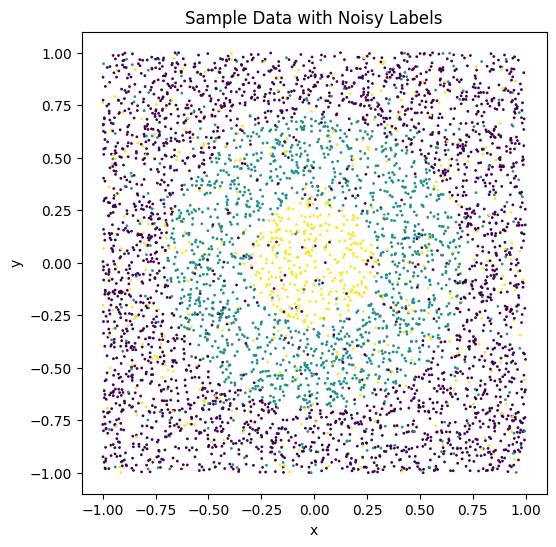

In [5]:
import matplotlib.pyplot as plt

# Plot the points
plt.figure(figsize=(6, 6))
plt.scatter(data[:,0], data[:,1], c=labels, cmap='viridis', s=1)
plt.title('Sample Data with Noisy Labels')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [6]:
import torch.nn.functional as F

data_torch = torch.tensor(data, dtype=torch.float32)
labels_torch = torch.tensor(labels)

print(f"before, one hot : {labels_torch.shape}")
labels_torch = F.one_hot(labels_torch)
print(f"after, one hot : {labels_torch.shape}")

data_length = len(data_torch)
split_length = int(0.8*data_length)

train_data = data_torch[:split_length]
train_labels = labels_torch[:split_length]
val_data = data_torch[split_length:]
val_labels = labels_torch[split_length:]

print(train_data.shape, train_labels.shape, train_labels.dtype)

before, one hot : torch.Size([5000])
after, one hot : torch.Size([5000, 3])
torch.Size([4000, 2]) torch.Size([4000, 3]) torch.int64


In [7]:
g = torch.Generator().manual_seed(42)

def get_batch(data, labels, batch_size=256):
    indices = torch.randint(0, len(data), size=(batch_size,), generator= g)

    data_batch = data[indices]
    labels_batch = labels[indices]

    return data_batch, labels_batch

data_batch, labels_batch = get_batch(train_data,train_labels)
print(data_batch.shape, labels_batch.shape)

torch.Size([256, 2]) torch.Size([256, 3])


In [8]:
def custom_cross_entropy_loss(output, ont_hot_label):
    exp_output = torch.exp(output)
    total = torch.sum(exp_output, dim=1, keepdim=True)
    softmax_output = exp_output/total
    log_prob = - torch.log(softmax_output)
    nll = (log_prob * ont_hot_label).sum(dim=1)
    return torch.mean(nll)


In [9]:
import torch
import torch.nn as nn
import torch.optim as optim


input_size = 2
hidden_size = 4
output_size = 3

torch.manual_seed(42)
g.manual_seed(42)

class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.seq_model = nn.Sequential(
            nn.Linear(input_size, hidden_size),
            nn.ReLU(),
            nn.Linear(hidden_size, hidden_size),
            nn.ReLU(),
            nn.Linear(hidden_size, output_size)
        )

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.seq_model(x)

net = Net()
optimizer = optim.SGD(net.parameters(), lr=0.01)

for steps in range(100000):
    net.train()
    data_batch, labels_batch = get_batch(data_torch, labels_torch, batch_size=256)
    output = net(data_batch)

    loss = custom_cross_entropy_loss(output, labels_batch)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()


    if steps % 1000 == 0:
        net.eval()
        output = net(val_data)
        val_loss = custom_cross_entropy_loss(output, val_labels)
        print(f"{steps} val_loss: {val_loss.item()}")

0 val_loss: 1.1056251525878906
1000 val_loss: 0.9670233726501465
2000 val_loss: 0.96729975938797
3000 val_loss: 0.9666537642478943
4000 val_loss: 0.9654695391654968
5000 val_loss: 0.96275794506073
6000 val_loss: 0.9593054056167603
7000 val_loss: 0.9535040855407715
8000 val_loss: 0.9438685774803162
9000 val_loss: 0.9269222021102905
10000 val_loss: 0.8950017690658569
11000 val_loss: 0.8204203248023987
12000 val_loss: 0.7642731666564941
13000 val_loss: 0.7433012127876282
14000 val_loss: 0.7342105507850647
15000 val_loss: 0.7313199043273926
16000 val_loss: 0.7296494245529175
17000 val_loss: 0.7274362444877625
18000 val_loss: 0.7254444360733032
19000 val_loss: 0.7245737910270691
20000 val_loss: 0.7209059000015259
21000 val_loss: 0.718664288520813
22000 val_loss: 0.7181721329689026
23000 val_loss: 0.7145180702209473
24000 val_loss: 0.7124754786491394
25000 val_loss: 0.7089722752571106
26000 val_loss: 0.7018445730209351
27000 val_loss: 0.6972601413726807
28000 val_loss: 0.6905602812767029
290

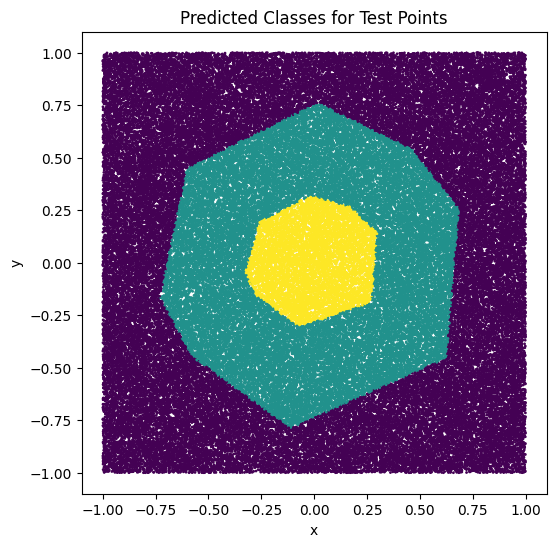

In [10]:
import numpy as np
import matplotlib.pyplot as plt

n_points_test = 100000
points_test = np.random.uniform(-1, 1, (n_points_test, 2))
points_test_torch = torch.from_numpy(points_test).float()

net.eval()
output_test = net(points_test_torch)

probabilities = torch.softmax(output_test, dim=1)
predictions = torch.argmax(probabilities, dim=1)
predictions_np = predictions.numpy()

plt.figure(figsize=(6, 6))
plt.scatter(points_test[:, 0], points_test[:, 1], c=predictions_np, cmap='viridis', s=1)
plt.title('Predicted Classes for Test Points')
plt.xlabel('x')
plt.ylabel('y')
plt.show()


In [11]:
import torch.nn.functional as F

data_torch = torch.tensor(data, dtype=torch.float32)
labels_torch = torch.tensor(labels, dtype=torch.long)

data_length = len(data_torch)
split_length = int(0.8*data_length)

train_data = data_torch[:split_length]
train_labels = labels_torch[:split_length]
val_data = data_torch[split_length:]
val_labels = labels_torch[split_length:]

print(train_data.shape, train_labels.shape, train_labels.dtype)

torch.Size([4000, 2]) torch.Size([4000]) torch.int64


In [14]:
import torch
import torch.nn as nn
import torch.optim as optim

input_size = 2
hidden_size = 4
output_size = 3

torch.manual_seed(42)
g.manual_seed(42)

class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.seq_model = nn.Sequential(
            nn.Linear(input_size, hidden_size),
            nn.ReLU(),
            nn.Linear(hidden_size, hidden_size),
            nn.ReLU(),
            nn.Linear(hidden_size, output_size)
        )

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.seq_model(x)

net = Net()
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.01)

for steps in range(100000):
    net.train()
    data_batch, labels_batch = get_batch(data_torch, labels_torch, batch_size=256)
    output = net(data_batch)

    loss = loss_fn(output, labels_batch)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()


    if steps % 1000 == 0:
        net.eval()
        output = net(val_data)
        val_loss = loss_fn(output, val_labels)
        print(f"{steps} val_loss: {val_loss.item()}")

0 val_loss: 1.1056251525878906
1000 val_loss: 0.9670233726501465
2000 val_loss: 0.96729975938797
3000 val_loss: 0.9666538834571838
4000 val_loss: 0.9654695391654968
5000 val_loss: 0.96275794506073
6000 val_loss: 0.9593053460121155
7000 val_loss: 0.9535041451454163
8000 val_loss: 0.9438686370849609
9000 val_loss: 0.9269223213195801
10000 val_loss: 0.8950017094612122
11000 val_loss: 0.8204204440116882
12000 val_loss: 0.7642732262611389
13000 val_loss: 0.7433012127876282
14000 val_loss: 0.7342105507850647
15000 val_loss: 0.7313199639320374
16000 val_loss: 0.7296494841575623
17000 val_loss: 0.7274362444877625
18000 val_loss: 0.7254443764686584
19000 val_loss: 0.7245737910270691
20000 val_loss: 0.7209059596061707
21000 val_loss: 0.7186642289161682
22000 val_loss: 0.718172013759613
23000 val_loss: 0.7145180106163025
24000 val_loss: 0.712475597858429
25000 val_loss: 0.708972156047821
26000 val_loss: 0.7018444538116455
27000 val_loss: 0.6972602009773254
28000 val_loss: 0.6905602812767029
29000

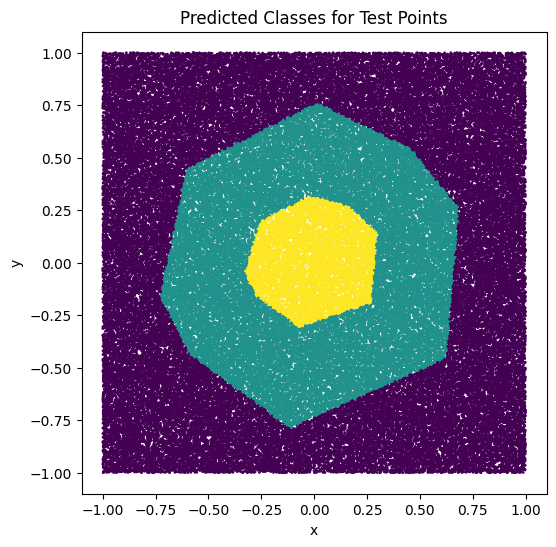

In [15]:
import numpy as np
import matplotlib.pyplot as plt

n_points_test = 100000
points_test = np.random.uniform(-1, 1, (n_points_test, 2))
points_test_torch = torch.from_numpy(points_test).float()

net.eval()
output_test = net(points_test_torch)

probabilities = torch.softmax(output_test, dim=1)
predictions = torch.argmax(probabilities, dim=1)
predictions_np = predictions.numpy()

plt.figure(figsize=(6, 6))
plt.scatter(points_test[:, 0], points_test[:, 1], c=predictions_np, cmap='viridis', s=1)
plt.title('Predicted Classes for Test Points')
plt.xlabel('x')
plt.ylabel('y')
plt.show()